<a href="https://colab.research.google.com/github/NicLopes/Projeto_Iris/blob/main/Projeto_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Universidade Cruzeiro do Sul


## Ciência de Dados e Aprendizado de Máquina

### 2º Semestre de 2024
<br></br>

# Relatório do Projeto




 Nicollas S. L. Lima | RGM : 26523507





---
# Analise Dataset Iris
---



## Introdução

**contextualização**

Dificuldades na Classificação e Regressão
Dentro do conjunto de dados Iris, enfrentamos um desafio de classificação. A tarefa de classificar é um aprendizado supervisionado cujo propósito é atribuir uma classificação a novas observações, baseando-se em dados de treinamento previamente categorizados. No conjunto de dados Iris, as classes representam as variadas espécies de flores. O modelo tentará determinar a espécie de uma flor com base nas suas características mensuradas.

Exemplo de dilema de classificação: Com base em determinadas características de uma flor, como o comprimento e a largura da sépala, o modelo precisa determinar se a flor é da espécie Setosa, Versicolor ou Virginica.

Por outro lado, desafios de regressão envolvem a previsão de um valor constante, como a temperatura ou o valor de um imóvel, com base em dados passados.

**funcionamento do algoritmo**

**KNN**

Quando um novo ponto de dados precisa ser classificado, o algoritmo calcula a distância entre esse ponto e todos os pontos de dados do conjunto de treinamento.
Ele identifica os k vizinhos mais próximos (ou seja, aqueles com as menores distâncias).
A classe mais comum entre esses vizinhos é atribuída ao novo ponto. O valor de k é um parâmetro que pode ser ajustado; um valor pequeno pode ser sensível ao ruído, enquanto um valor maior pode suavizar as decisões.

**Naive Bayes**

O algoritmo calcula a probabilidade de cada classe dado um conjunto de características (atributos) usando o teorema de Bayes.
A classe com a maior probabilidade é escolhida como a previsão.
Para cada atributo, a probabilidade é calculada assumindo que todos os atributos são independentes (daí o "naive").

## Objetivo


A meta principal é categorizar as flores do dataset Iris em suas espécies correspondentes (Setosa, Versicolor ou Virginica) com base em quatro características mensuradas: comprimento e largura da sépala, além do comprimento e largura da pétala. A estratégia é um desafio de classificação supervisionada, no qual possuímos dados etiquetados para treinar os modelos.

## Desenvolvimento


#### Parte 1 - Importando os dados

Vamos importar um dataset do GitHub





Importando as bibliotecas


In [ ]:
# Importar as bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

Carregando o dataset Iris

In [ ]:
# URL
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
# Carregar o dataset Iris
iris = pd.read_csv(url)

iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
X = iris.drop(columns=["variety"])  # Excluir a coluna 'variety', que é o target
y = iris["variety"]

#### Parte 2 - Implementação dos algoritmos

Modelo KNN

Teste e treino

In [ ]:

# Dividir o dataset em conjunto de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Criando modelo KNN

In [ ]:

# Criar o modelo KNN com k=3
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

Treinando o modelo

In [ ]:
# Treinar o modelo
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Previsões

In [ ]:
# Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test)

Grafico

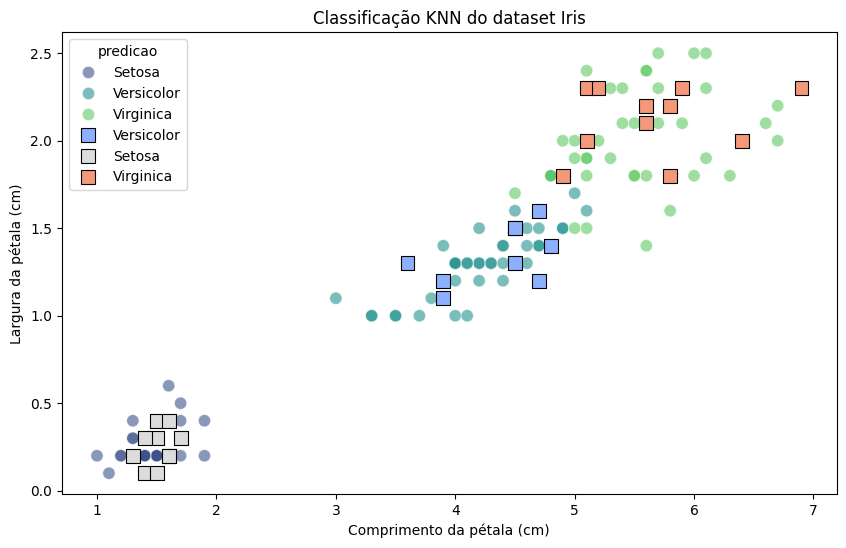

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plotar os dados de treino e teste
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris, x="petal.length", y="petal.width", hue='variety', palette="viridis", s=80, alpha=0.6)

# Criar um DataFrame para os dados de teste e suas previsões
test_results = pd.DataFrame(X_test)
test_results['predicao'] = y_pred
test_results['actual'] = y_test.reset_index(drop=True)

# Plotar os dados de teste com as previsões
sns.scatterplot(data=test_results, x="petal.length", y="petal.width", hue='predicao', palette="coolwarm", s=100, marker='s', edgecolor='k')

# Adicionar título e rótulos
plt.title("Classificação KNN do dataset Iris")
plt.xlabel("Comprimento da pétala (cm)")
plt.ylabel("Largura da pétala (cm)")

# Exibir gráfico
plt.show()

avaliando o modelo

In [ ]:

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy * 100:.2f}%")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Acurácia: 100.00%
Relatório de Classificação:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Matriz de Confusão:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Modelo Naive Bayes

Dividindo o dataset

In [ ]:
# Dividir o dataset em conjunto de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Criando modelo

In [ ]:
# Criar o modelo Naive Bayes
nb_model = GaussianNB()

Treino

In [ ]:
# Treinar o modelo
nb_model.fit(X_train, y_train)

GaussianNB()

previsões

In [ ]:
# Fazer previsões no conjunto de teste
y_pred = nb_model.predict(X_test)


Grafico

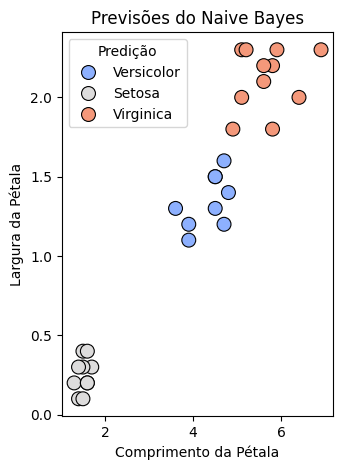

In [ ]:
test_results = pd.DataFrame(X_test)
test_results['Predição'] = y_pred
test_results['Real'] = y_test.values

plt.subplot(1, 2, 2)
sns.scatterplot(data=test_results, x="petal.length", y="petal.width", hue="Predição", palette="coolwarm", s=100, marker='o', edgecolor="k")
plt.title("Previsões do Naive Bayes")
plt.xlabel("Comprimento da Pétala")
plt.ylabel("Largura da Pétala")

plt.tight_layout()
plt.show()

Esses resultados refletem um bom ajuste do modelo Gaussian Naive Bayes ao dataset Iris, possivelmente favorecido pela separabilidade das características no espaço de petal length e petal width

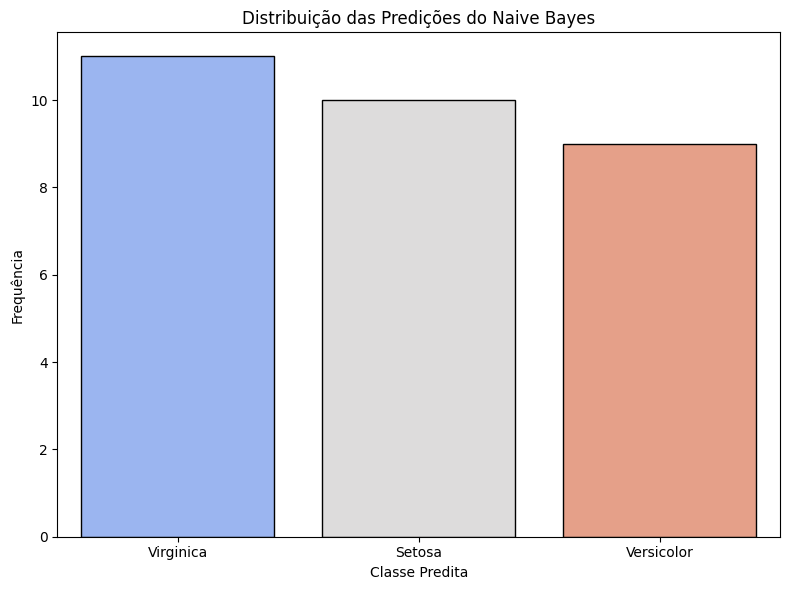

In [ ]:
prediction_counts = test_results['Predição'].value_counts()

# Configurar o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(
    x=prediction_counts.index,
    y=prediction_counts.values,
    hue=prediction_counts.index,
    palette="coolwarm",
    edgecolor="k",
    dodge=False,
    legend=False
)

plt.title("Distribuição das Predições do Naive Bayes")
plt.xlabel("Classe Predita")
plt.ylabel("Frequência")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


Avaliando modelo

In [ ]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy * 100:.2f}%")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Acurácia: 100.00%
Relatório de Classificação:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Matriz de Confusão:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## Conclusão


As visualizações geradas evidenciaram a eficácia dos modelos analisados. A camada de pontos, representando os dados reais, destacou a separação das classes, enquanto os quadrados, correspondentes às previsões, ilustraram a precisão obtida. Ambos os algoritmos demonstraram um bom desempenho na classificação da maioria das amostras, com o Naive Bayes sobressaindo pela combinação de simplicidade e precisão.

Ao comparar os modelos, ambos se mostraram adequados para o dataset Iris. O Naive Bayes revelou-se particularmente eficiente e robusto para datasets menores devido à sua abordagem probabilística, enquanto o KNN apresentou maior flexibilidade, permitindo ajustes no número de vizinhos (k) e nas métricas de distância para atender a diferentes cenários de classificação.

## Referências


1.   Slides de Aula - Aula 3.
2.   Slides de Aula - Aula 4 - Slides 5 e 6.
3.   Documentação do Scikit Learn - Toy Datasets: https://scikit-learn.org/stable/datasets/toy_dataset.html.
4. Artigo Wikipedia - Perceptron : https://pt.wikipedia.org/wiki/Perceptron.
5. FREUND, Yoav; SCHAPIRE, Robert E. Large margin classification using the perceptron algorithm. In: Proceedings of the eleventh annual conference on Computational learning theory. 1998. p. 209-217.



